# Convolution Neural Networks
In This notebook I will experiment with the MNIST data set. First I will train a sequential model on the dataset as a baseline model then I will see how a convolution neural network performs on the dataset.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the mnist dataset into training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

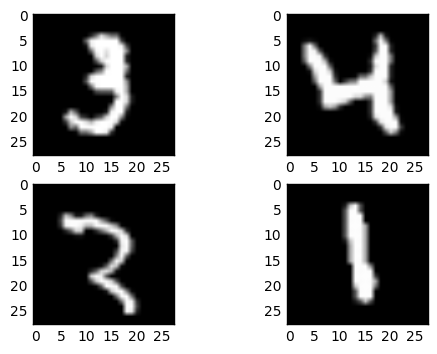

In [3]:
# Plot the first some of the training images
plt.figure()
plt.subplot(2,2,1)
plt.imshow(X_train[10], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(X_train[20], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(X_train[500], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.imshow(X_train[200], cmap=plt.get_cmap('gray'))

In [40]:
# Let's start by trying out a sequential model 
# I will use this as a baseline model before implementing a convoluation neural network
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [41]:
# Flatten the 28 x 28 images to a 784 vector for each image
pixels = X_train[0].shape[0] * X_train[0].shape[1]

In [42]:
X_train = X_train.reshape(X_train.shape[0], pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], pixels).astype('float32')

In [43]:
# Normalize the pixel values from 0-1 instead of 0-255
X_train = X_train / 255
X_test = X_test / 255

In [48]:
# Convert the labels to a vector with one hot encoding for each of the classes
y_train = np_utils.to_categorical(y_train)

In [51]:
y_test = np_utils.to_categorical(y_test)

In [52]:
num_classes = y_test.shape[1]

In [53]:
print num_classes

10


In [55]:
# Define a baseline model function to create the sequential model
def baseline_model():
    # Create the model
    model = Sequential()
    model.add(Dense(pixels, input_dim=pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [56]:
# Create the model and train it on the data
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch=10, batch_size = 200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print 'baseline error %.2f%%' %(100 - scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
3s - loss: 0.2790 - acc: 0.9215 - val_loss: 0.1393 - val_acc: 0.9607
Epoch 2/10
3s - loss: 0.1098 - acc: 0.9690 - val_loss: 0.0925 - val_acc: 0.9719
Epoch 3/10
3s - loss: 0.0703 - acc: 0.9801 - val_loss: 0.0741 - val_acc: 0.9773
Epoch 4/10
3s - loss: 0.0492 - acc: 0.9855 - val_loss: 0.0678 - val_acc: 0.9801
Epoch 5/10
3s - loss: 0.0356 - acc: 0.9902 - val_loss: 0.0663 - val_acc: 0.9773
Epoch 6/10
3s - loss: 0.0256 - acc: 0.9929 - val_loss: 0.0617 - val_acc: 0.9798
Epoch 7/10
3s - loss: 0.0196 - acc: 0.9948 - val_loss: 0.0600 - val_acc: 0.9810
Epoch 8/10
3s - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0572 - val_acc: 0.9821
Epoch 9/10
3s - loss: 0.0104 - acc: 0.9979 - val_loss: 0.0628 - val_acc: 0.9808
Epoch 10/10
3s - loss: 0.0073 - acc: 0.9988 - val_loss: 0.0651 - val_acc: 0.9804
baseline error 1.96%


# Convolution Neural Net
In this section I will build a convolution neural network for the MNIST dataset. The CNN will implement convolution layers, pooling layers, and dropout layers.

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Load the data and reshape to the input required for the cnn
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [3]:
# Normalize the inputs from 0-1
X_train = X_train / 255
X_test = X_test / 255

# One hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print num_classes

10


In [4]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(32, 5, 5, input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [5]:
model = baseline_model()
model.fit(X_train, y_train, validation_data(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

ValueError: Negative dimension size caused by subtracting 5 from 1